In [12]:
import pandas as pd
from matplotlib.pyplot import *

In [2]:
stock = "AMBUJACEM"
options = []
prices = []

for i in range(6):
    options.append("%s-options-PE-%s.csv"%(stock,str(i+1)))
    prices.append("%s-prices-%s.csv"%(stock,str(i+1)))

In [3]:
opts_df = []
prices_df = []

for x in options:
    opts_df.append(pd.read_csv(x))

for x in prices:
    prices_df.append(pd.read_csv(x))

In [4]:
opts = pd.concat(opts_df)
prices = pd.concat(prices_df)

In [5]:
opts = opts.set_index('Date')
prices = prices.set_index('Date')

In [6]:
opts["Change"] = (opts["Close"] - opts["Open"])*100 / opts["Open"]
prices["Change"] = (prices["Close"] - prices["Open"])*100 / prices["Open"]
opts["Delta"] = abs(opts["Change"] / prices["Change"])

In [7]:
opts["Returns"] = opts.Change.shift(-1)

In [8]:
opts.head()

,Symbol,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value,Change,Delta,Returns
Date,,,,,,,,,,,,,,,,,,,
03-Jan-2022,AMBUJACEM,27-Jan-2022,PE,380,11.85,11.85,7.00,7.55,7.15,7.55,450,2622.44,57.44,277500,97500,387,-36.286920,16.658995,-3.076923
04-Jan-2022,AMBUJACEM,27-Jan-2022,PE,380,6.50,8.75,6.05,6.30,6.30,6.30,315,1829.61,34.11,291000,13500,-,-3.076923,4.111936,-20.168067
05-Jan-2022,AMBUJACEM,27-Jan-2022,PE,380,5.95,6.45,4.60,4.75,4.70,4.75,296,1712.00,24.80,261000,-30000,393.7,-20.168067,20.972101,19.834711
06-Jan-2022,AMBUJACEM,27-Jan-2022,PE,380,6.05,8.25,5.05,7.25,7.15,7.25,360,2087.71,35.71,261000,0,387.05,19.834711,25.368920,-32.413793
07-Jan-2022,AMBUJACEM,27-Jan-2022,PE,380,7.25,7.25,4.00,4.90,4.70,4.90,538,3108.44,41.84,349500,88500,397.25,-32.413793,12.299763,-11.250000


In [9]:
writer = pd.ExcelWriter("results.xlsx",engine="xlsxwriter")

In [10]:
opts.to_excel(writer,sheet_name="options")
prices.to_excel(writer,sheet_name="prices")

In [11]:
writer.save()

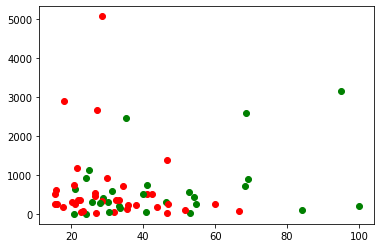

In [22]:
col = "No. of contracts"
for index,rows in opts.iterrows():
    if rows["Returns"] > 200:
        continue
    if rows["Returns"] >= 20:
        scatter(rows["Returns"],rows[col],color="green")
    elif rows["Returns"] <= -15:
        scatter(abs(rows["Returns"]),rows[col],color="red")